# Titanic Disaster Competition Project (Kaggle) 


 You'll find the Data Dictionnary which explains the meaning of variables names by following this Url: 

https://www.kaggle.com/c/titanic/data 
you'll find the Data Dictionnary which explains the meaning of variables names.

Input variables:

*pclass: Ticket class - Categorical - Values: 1 = 1st, 2 = 2nd, 3 = 3rd.

*sex:  Categorical - Values: male or female.

*Age:  Age in years - Numerical.

*sibsp: # of siblings / spouses aboard the Titanic - Numerical.

*parch: # of parents / children aboard the Titanic - Numerical.

*ticket: Ticket number - Mix of Numbers and Characters.

*fare: Passenger fare - Numerical.

*cabin: Cabin number - Mix of Numbers and Characters.

*embarked: Port of Embarkation - Categorical - Values: C = Cherbourg, Q = Queenstown, S = Southampton.

*Target Variable:
survival: Categorical - Values: 0 = No, 1 = Yes.

Loading Data from :
https://www.kaggle.com/c/titanic/data




In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [67]:
data_train = pd.read_csv('train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
data_test = pd.read_csv('test.csv')
y_test = pd.read_csv('gender_submission.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [64]:
data_train.shape

(891, 12)

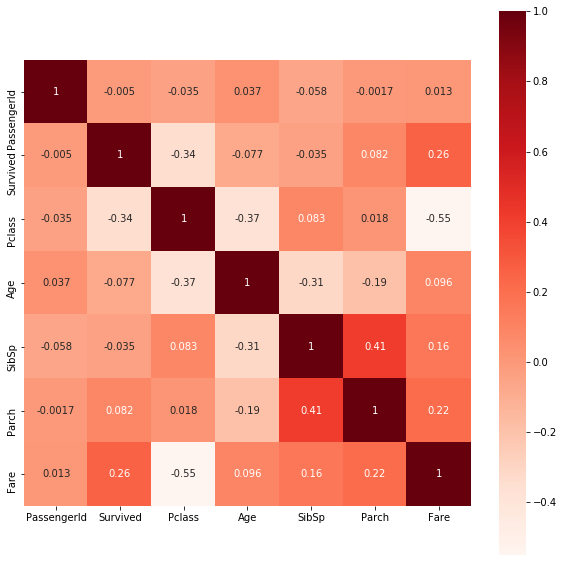

In [66]:
plt.figure(figsize=(10, 10))
sns.heatmap(data_train.corr(), annot = True,square=True,cmap=plt.cm.Reds)

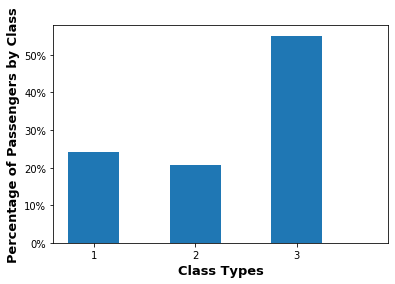

In [73]:
plt.hist(data_train['Pclass'],weights=np.ones(len(data_train['Pclass'])) / len(data_train['Pclass']), bins=np.arange(1,5)-0.25 , width=0.5)

plt.ylabel('Percentage of Passengers by Class',  fontsize=13,fontweight='bold')
plt.xlabel('Class Types',  fontsize=13,fontweight='bold')
plt.xticks(range(1,4))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

comment: We can see the Percentage of Passengers in each Class

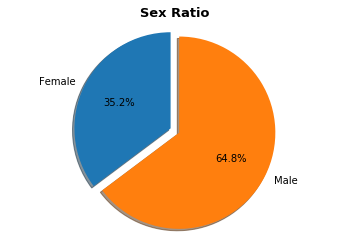

In [74]:
labels = 'Female', 'Male'
sizes = [data_train['Sex'].loc[data_train['Sex'] == "female"].count()/data_train['Sex'].count(), data_train['Sex'].loc[data_train['Sex'] == "male"].count()/data_train['Sex'].count()]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Sex Ratio',  fontsize=13,fontweight='bold')
plt.show()


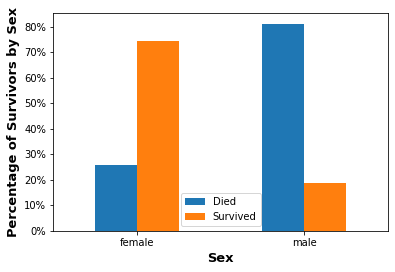

In [75]:
df=pd.crosstab(data_train['Sex'],data_train['Survived']).apply(lambda r: r/r.sum(), axis=1)
df.plot.bar()
plt.ylabel('Percentage of Survivors by Sex',  fontsize=13,fontweight='bold')
plt.xlabel('Sex',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)

L=plt.legend()
L.get_texts()[0].set_text('Died')
L.get_texts()[1].set_text('Survived')
plt.show()

plt.show()

Comment : The majority of female sex are survived but for male the majority are Died 

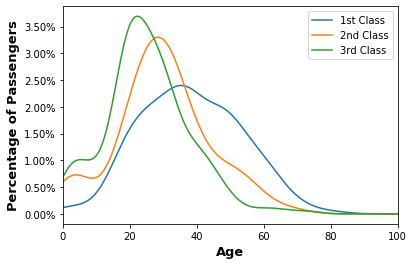

In [76]:
data_train.groupby('Pclass').Age.plot(kind='kde')
plt.ylabel('Percentage of Passengers',  fontsize=13,fontweight='bold')
plt.xlabel('Age',  fontsize=13,fontweight='bold')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(rotation=360)
plt.xlim(xmin=0,xmax=100 )
plt.legend()
L=plt.legend()
L.get_texts()[0].set_text('1st Class')
L.get_texts()[1].set_text('2nd Class')
L.get_texts()[2].set_text('3rd Class')


plt.show()

In [29]:
data_train= data_train[['Survived','Pclass','Sex','Age']]
data_train['Sex'].replace(['male','female'],[0,1], inplace= True) 
data_train.dropna(axis= 0, inplace= True)
x_train= data_train[['Pclass','Sex','Age']]
y_train =  data_train[['Survived']]

In [30]:
x_train.head()

,Pclass,Sex,Age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0


In [31]:
x_train.shape

(714, 3)

In [32]:
x_train.shape

(714, 3)

In [33]:
model = KNeighborsClassifier()
k= np.arange(1,50)
train_score , val_score = validation_curve(model, x_train, y_train,'n_neighbors',k,cv=5)
val_score.mean(axis=1)

C:\Users\Saloua\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Saloua\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Saloua\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Saloua\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vect

array([0.76047474, 0.76194228, 0.76470994, 0.75206343, 0.76189304,
       0.75069438, 0.75768738, 0.74228307, 0.75494928, 0.75212253,
       0.76052398, 0.74510982, 0.76752684, 0.7297252 , 0.73951541,
       0.73669851, 0.74791687, 0.73533931, 0.73809711, 0.72968581,
       0.74226337, 0.7170787 , 0.73244361, 0.70446174, 0.71004629,
       0.69326307, 0.69324338, 0.68486162, 0.68906727, 0.6722742 ,
       0.68485177, 0.69046587, 0.68907712, 0.67925736, 0.68764897,
       0.67645031, 0.68065596, 0.67086575, 0.67084606, 0.64567123,
       0.64985719, 0.63866837, 0.64708953, 0.63867822, 0.64004728,
       0.63726977, 0.64004728, 0.63447257, 0.64146558])

No handles with labels found to put in legend.


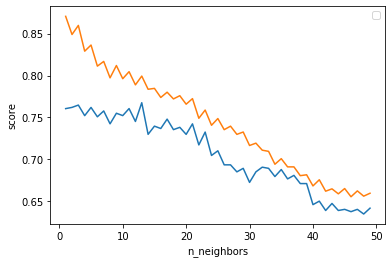

In [35]:
plt.plot(k, val_score.mean(axis=1))
plt.plot(k, train_score.mean(axis=1))
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [36]:
 param_grid = {'n_neighbors':np.arange(1,20), 'metric':['euclidean','manhattan']}

In [39]:
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(x_train,y_train)
grid.best_score_

C:\Users\Saloua\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Saloua\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Saloua\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Saloua\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vect

0.7716930956367575

In [40]:
grid.best_score_

0.7716930956367575

In [41]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5}

In [42]:
modele = grid.best_estimator_

In [45]:
df_test = pd.merge(data_test , y_test, on= 'PassengerId')

In [46]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [47]:
df_test.shape

(418, 12)

In [48]:
df_test1= df_test[['PassengerId','Survived','Pclass','Sex','Age']]
df_test1['Sex'].replace(['male','female'],[0,1], inplace= True) 
df_test1.dropna(axis= 0, inplace= True)
x_test= df_test1[['Pclass','Sex','Age']]
y_test = df_test1[['Survived']]

C:\Users\Saloua\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Saloua\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
x_test.shape

(332, 3)

In [50]:
y_test.shape

(332, 1)

In [51]:
modele.score(x_test , y_test)

0.8102409638554217

In [53]:
y_pred = modele.predict(x_test)
 
y_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,

In [54]:
submission_survived = pd.DataFrame(pd.DataFrame({ "PassengerId": df_test1['PassengerId'],
                                                   "survided":  y_pred
     }))
submission_survived.to_csv('submission_survived3.csv', index= False )

In [55]:
submission_survived.head()

,PassengerId,survided
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [56]:
modele.score(x_test , y_test)

0.8102409638554217

The Score of this simple model is 81% but there is still room for improvement.